In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-01-07 11:35:23.689069: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-07 11:35:23.725140: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 11:35:23.924247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 11:35:23.924344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 11:35:23.955067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
mnist_data = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist_data.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(y_train[0])


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
5


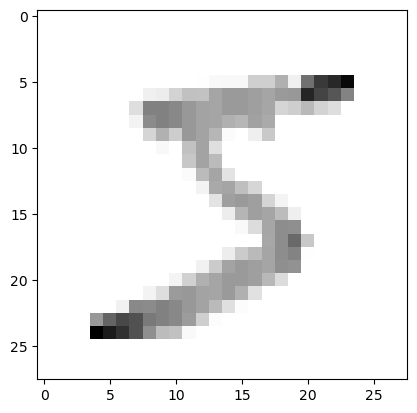

In [4]:
def display(n):
	
	plt.imshow(n,cmap=plt.cm.binary)
	plt.show() 
	
display(x_train[0])


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2864 - accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1208 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0814 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0479 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [6]:
loss,acc = model.evaluate(x_test,y_test)
l,a=model.evaluate(x_train,y_train)
print(l,a)
print("loss-> ",loss,"\nacc-> ",acc)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0109 - accuracy: 0.9969
0.010879757814109325 0.9968833327293396
loss->  0.11634417623281479 
acc->  0.9746000170707703


313/313 [==============================] - 1s 1ms/step
label ->  4
prediction ->  4


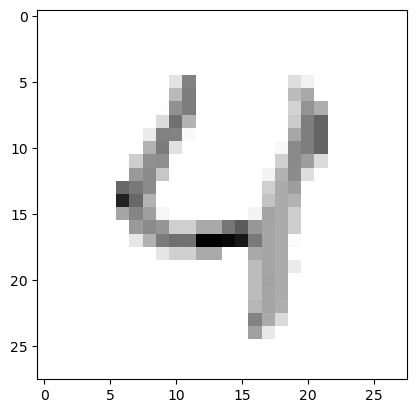

In [7]:
prediction=model.predict([x_test])
print('label -> ',y_test[4])
print('prediction -> ',np.argmax(prediction[4]))
display(x_test[4])